In [3]:
import pydot
import networkx as nx
import pygraphviz as pgv
import tempfile
from IPython.display import Image, display

In [4]:
def draw_graph(G):
    with tempfile.TemporaryFile() as f:
        nx.nx_agraph.write_dot(G, f)
        f.seek(0)
        dot_source = f.read().decode()
    agraph = pgv.AGraph(dot_source)
    display(Image(agraph.draw(format='png', prog='dot')))

In [5]:
def draw_state(graph, current_node, state):
    graph.add_node("state", color="red", label=f"{state}")
    graph.add_edge("state", current_node, color="red")
    draw_graph(graph)
    graph.remove_edge("state", current_node)

In [6]:
def parse_func(fun_str):
    return None if fun_str == None else eval(fun_str.strip('"'))

In [7]:
def format_lambda(lam):
    return "default" if lam == "default" else lam[7:-1].replace(":", " --&gt;") if lam else ""

In [8]:
graph_data = """digraph Main {
    start [function="lambda x: (x, 1)"];
    factorial [function="lambda t: (t[0]-1, t[1]*t[0])"]
    strip [function="lambda t: t[1]"]
    start -> factorial
    factorial -> factorial [condition="lambda t: t[0] != 0"]
    factorial -> strip
    strip -> end
}"""

In [9]:
def parse_graph(graph_data):
    graph = nx.drawing.nx_pydot.from_pydot(pydot.graph_from_dot_data(graph_data)[0])
    
    for node in graph.nodes:
        graph.nodes[node]["label"] = "<<B>" + node + "</B><BR/>" + format_lambda(graph.nodes[node].get("function", "")) + ">"

    for b, e, index in graph.edges:
        graph.edges[b, e, index]["label"] = format_lambda(graph.edges[b, e, index].get("condition", "default"))

    return graph

In [10]:
def eval_graph(graph, inputs):
    state = inputs
    current_node = "start"
    for i in range(1000):
        draw_state(graph, current_node, state)
        if current_node == "end":
            break
        
        function = parse_func(graph.nodes[current_node].get("function", None))
        if function is not None:
            state = function(state)
            
        suc_cons = {end: parse_func(cond) for start, end, cond in graph.edges(current_node, data="condition")}
        unconditional_successors = [suc for suc, con in suc_cons.items() if con is None]
        assert len(unconditional_successors) <= 1, f"Cannot have more than one unconditional successor. node={current_node}"
        
        matching_successors = [suc for suc, con in suc_cons.items() if con is not None and con(state)]
        assert len(matching_successors) <=1, "two successors matched - successors must be disjoint"
        if (matching_successors):
            current_node = matching_successors[0]
            continue
        
        assert unconditional_successors, f"No successors matched and no default successor. node={current_node}, state={state}"
        current_node = unconditional_successors[0]
        
    return state

In [274]:
graph = parse_graph(graph_data)

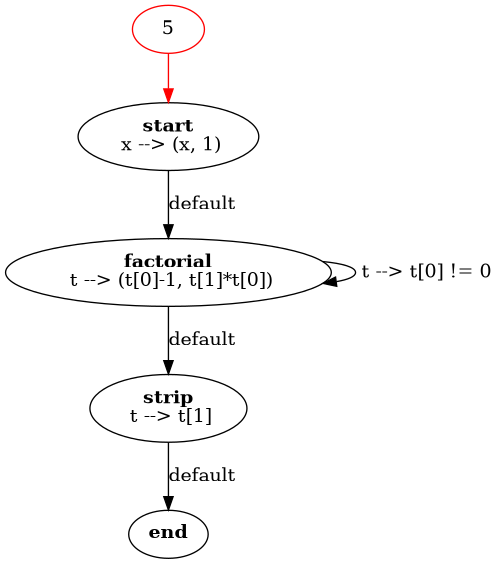

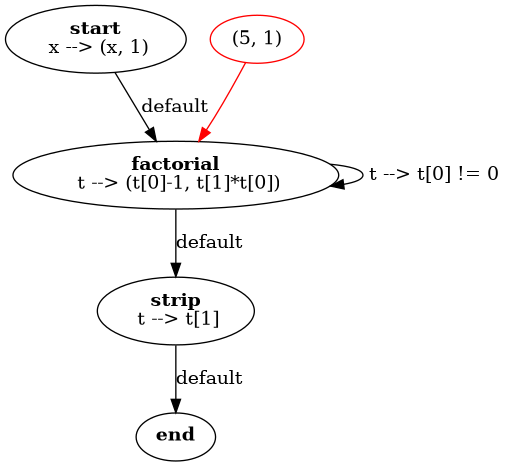

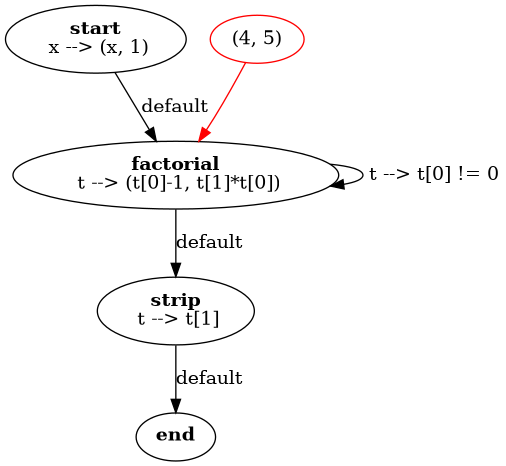

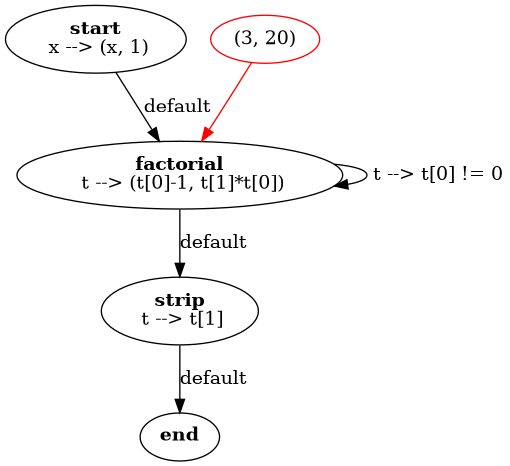

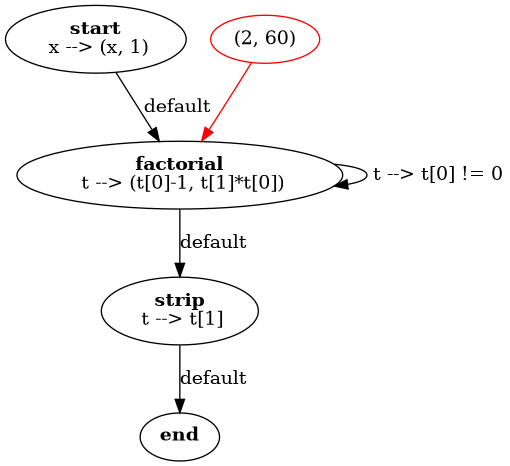

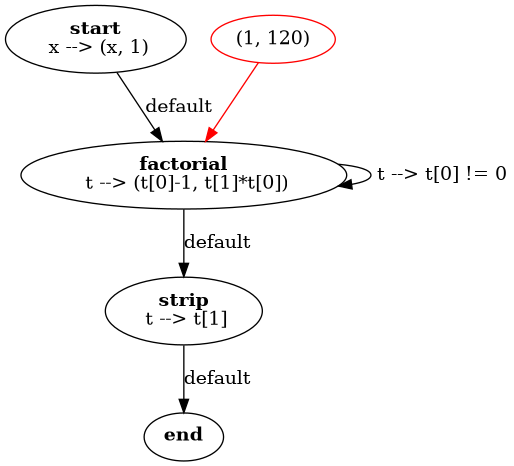

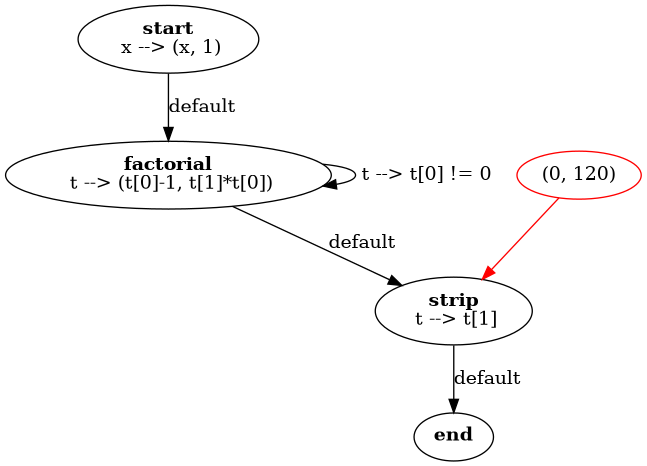

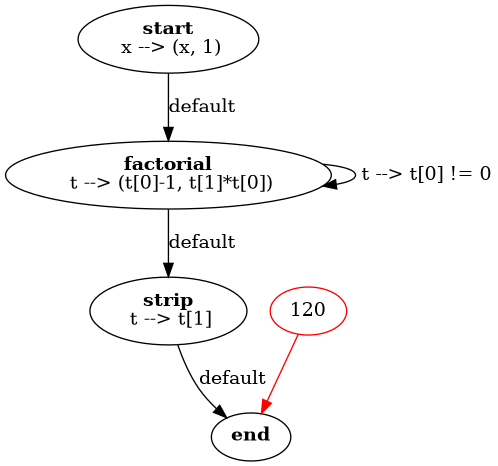

120

In [275]:
eval_graph(graph, 5)

In [180]:
pres_data = """graph Main {
    1 [label = A]
    2 [label = B]
    3 [label = B]
    4 [label = B]
    5 [label = B]
    1 -- {2 3 4 5} [label = a len=3]
    2 -- {3 4 5} [label = b  len=2]
    3 -- {4 5} [label = b len=2]
    4 -- {5} [label = b len=2]
    
}"""

In [191]:
pres_data = """graph Main {
    1 [label = A]
    subgraph cluster_0 {
    //style=invis
    2 [label = B]
    3 [label = B]
    4 [label = B]
    5 [label = B]
    2 -- {3 4 5} [label = b  len=2]
    3 -- {4 5} [label = b len=2]
    4 -- {5} [label = b len=2]
    }
    1 -- {2 3 4 5} [label = a len=3]
}"""

In [193]:
pres_data = """graph Main {
    1 [label = "A*"]
    subgraph cluster_0 {
    2 [label = "B*"]
    }
    1 -- 2 [label = "a*" len=3]
}"""

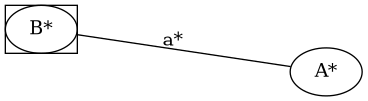

In [194]:
with tempfile.TemporaryFile() as f:
    # nx.nx_agraph.write_dot(nx.drawing.nx_pydot.from_pydot(pydot.graph_from_dot_data(pres_data)[0]), f)
    # f.seek(0)
    dot_source = pres_data # f.read().decode()
agraph = pgv.AGraph(dot_source)
display(Image(agraph.draw(format='png', prog='neato')))



In [71]:
pres_data = """digraph Main {
    3
    1 -> 2 -> 3 -> 4 -> 5 -> 1 [len = 1.5]
}"""

In [73]:
pres_data = """digraph Main {
    3
    1 -> 2 -> 3 -> 4 -> 5 -> 1 [len = 1.5]
    1 -> 3 -> 5 -> 2 -> 4 -> 1 [len = 3]
}"""

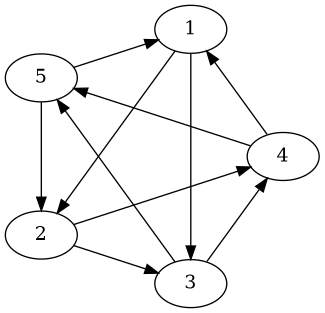

In [74]:
with tempfile.TemporaryFile() as f:
    # nx.nx_agraph.write_dot(nx.drawing.nx_pydot.from_pydot(pydot.graph_from_dot_data(pres_data)[0]), f)
    # f.seek(0)
    dot_source = pres_data # f.read().decode()
agraph = pgv.AGraph(dot_source)
display(Image(agraph.draw(format='png', prog='circo')))
